# Project Name - Liver Patient Prediction

# Business Case

The Liver Patient Prediction project utilizes the Indian Liver Patient Dataset (ILPD) for advanced analysis of liver health through machine learning. This initiative encompasses disease prediction, risk factor analysis, and the development of practical applications. By applying comprehensive data analysis and machine learning modeling

# **Aim**

The project aims to enhance liver disease diagnosis and management. The outcome is a predictive model that contributes to clinical decision support, offering valuable insights into liver health for improved healthcare outcomes.

## ***1. Know Your Data***

In [72]:
#Import libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [73]:
# Reading Dataset:
data = pd.read_csv(r"C:\Users\91961\Downloads\indian_liver_patient_updated.csv")

# 2. Basis checks

In [74]:
# Top 5 records:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [75]:
# last 5 records:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


## Shape of dataset

In [76]:
data.shape

(583, 11)

# Duplicate check

In [77]:
# Dataset Duplicate Value Count
duplicated_values_count = len(data[data.duplicated()])
duplicated_values_count

13

**Insights** Duplicate rows found

In [78]:
# Remove duplicates from the original DataFrame
data.drop_duplicates(inplace=True)

In [79]:
# Checking whether duplicate values removed
duplicated_values_count = len(data[data.duplicated()])
duplicated_values_count

0

# Missing values

In [80]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Class                         0
dtype: int64

**Insights** We have missing values in Albumin_and_Globulin_Ratio

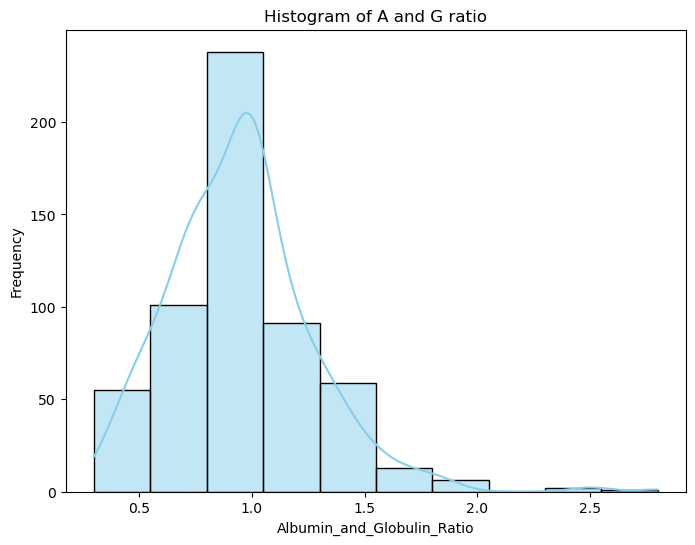

In [81]:
# Univariat analysis to fill the missing values
# Set up the subplot
plt.figure(figsize=(8, 6), facecolor='white')

# Create a histogram for the 'Age' column
sns.histplot(data['Albumin_and_Globulin_Ratio'], kde=True, bins=10, color='skyblue')
plt.title("Histogram of A and G ratio")
plt.xlabel("Albumin_and_Globulin_Ratio")
plt.ylabel("Frequency")

# Show the plot
plt.show()

**Insights** As per the above chart, we will fill Nan values with Median

In [82]:
# Filling NaN Values of "Albumin_and_Globulin_Ratio" feature with Median :
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [83]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64

# Data Type

In [84]:
#Data types
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Class                           int64
dtype: object

**Insights** Gender feature has object datatype, we need to convert into Numerical

# Label Encoding

In [85]:
# Label Encoding
data['Gender'] = np.where(data['Gender']=='Male', 1,0)

In [86]:
data.dtypes

Age                             int64
Gender                          int32
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Class                           int64
dtype: object

In [87]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Data Describe

In [88]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,570.0,44.849123,16.242182,4.0,33.0,45.00,58.00,90.0
Gender,570.0,0.754386,0.430829,0.0,1.0,1.00,1.00,1.0
Total_Bilirubin,570.0,3.321754,6.267941,0.4,0.8,1.00,2.60,75.0
Direct_Bilirubin,570.0,1.497544,2.833231,0.1,0.2,0.30,1.30,19.7
Alkaline_Phosphotase,570.0,291.750877,245.291859,63.0,176.0,208.00,298.00,2110.0
Alamine_Aminotransferase,570.0,79.728070,181.471697,10.0,23.0,35.00,60.00,2000.0
Aspartate_Aminotransferase,570.0,109.380702,290.880671,10.0,25.0,41.00,86.75,4929.0
Total_Protiens,570.0,6.496316,1.088300,2.7,5.8,6.60,7.20,9.6
Albumin,570.0,3.148947,0.796813,0.9,2.6,3.10,3.80,5.5
Albumin_and_Globulin_Ratio,570.0,0.948018,0.318510,0.3,0.7,0.95,1.10,2.8


**Insights** We need to check outliers as per the above information mainly for Alkaline_Phosphotase,
Alamine_Aminotransferase,Aspartate_Aminotransferase 

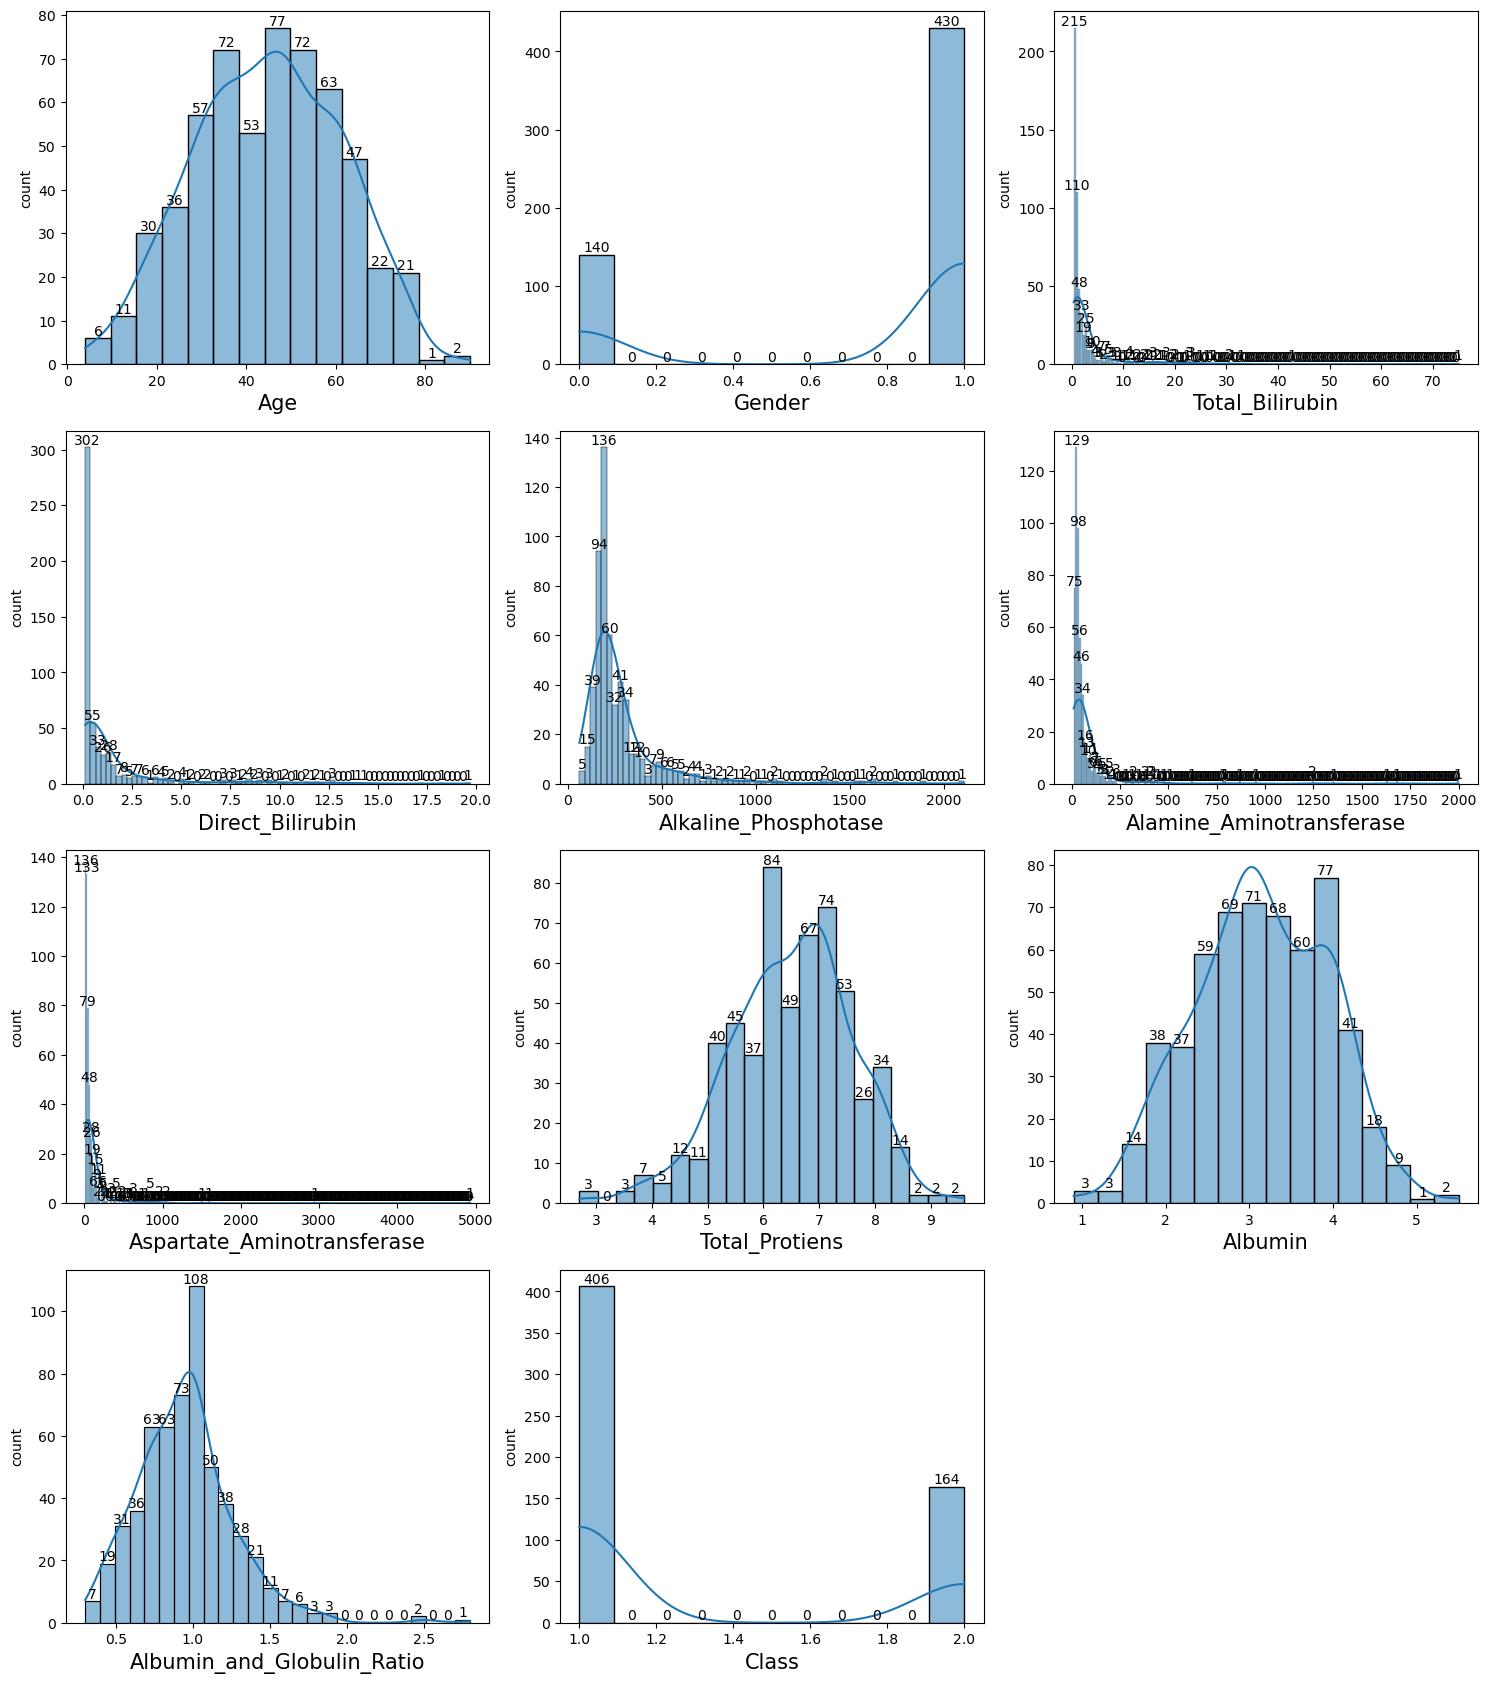

In [89]:
#Univariate Analysis
plt.figure(figsize=(15,50))
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(12,3,plotnumber)
        count=sns.histplot(x=data[column],kde=True)
        for bars in count.containers:
            count.bar_label(bars)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

**Insights**
Features Age, Gender, Total Protiens, Albumin, Albumin and Globulin ratio and Class data looks fine

Extreme outliers found Total Bilirubin, Direct_Bilirubin,Alkaline_Phosphotase, Alamine_Aminotransferase and Aspartate_Aminotransferase

# Bivariate Analysis

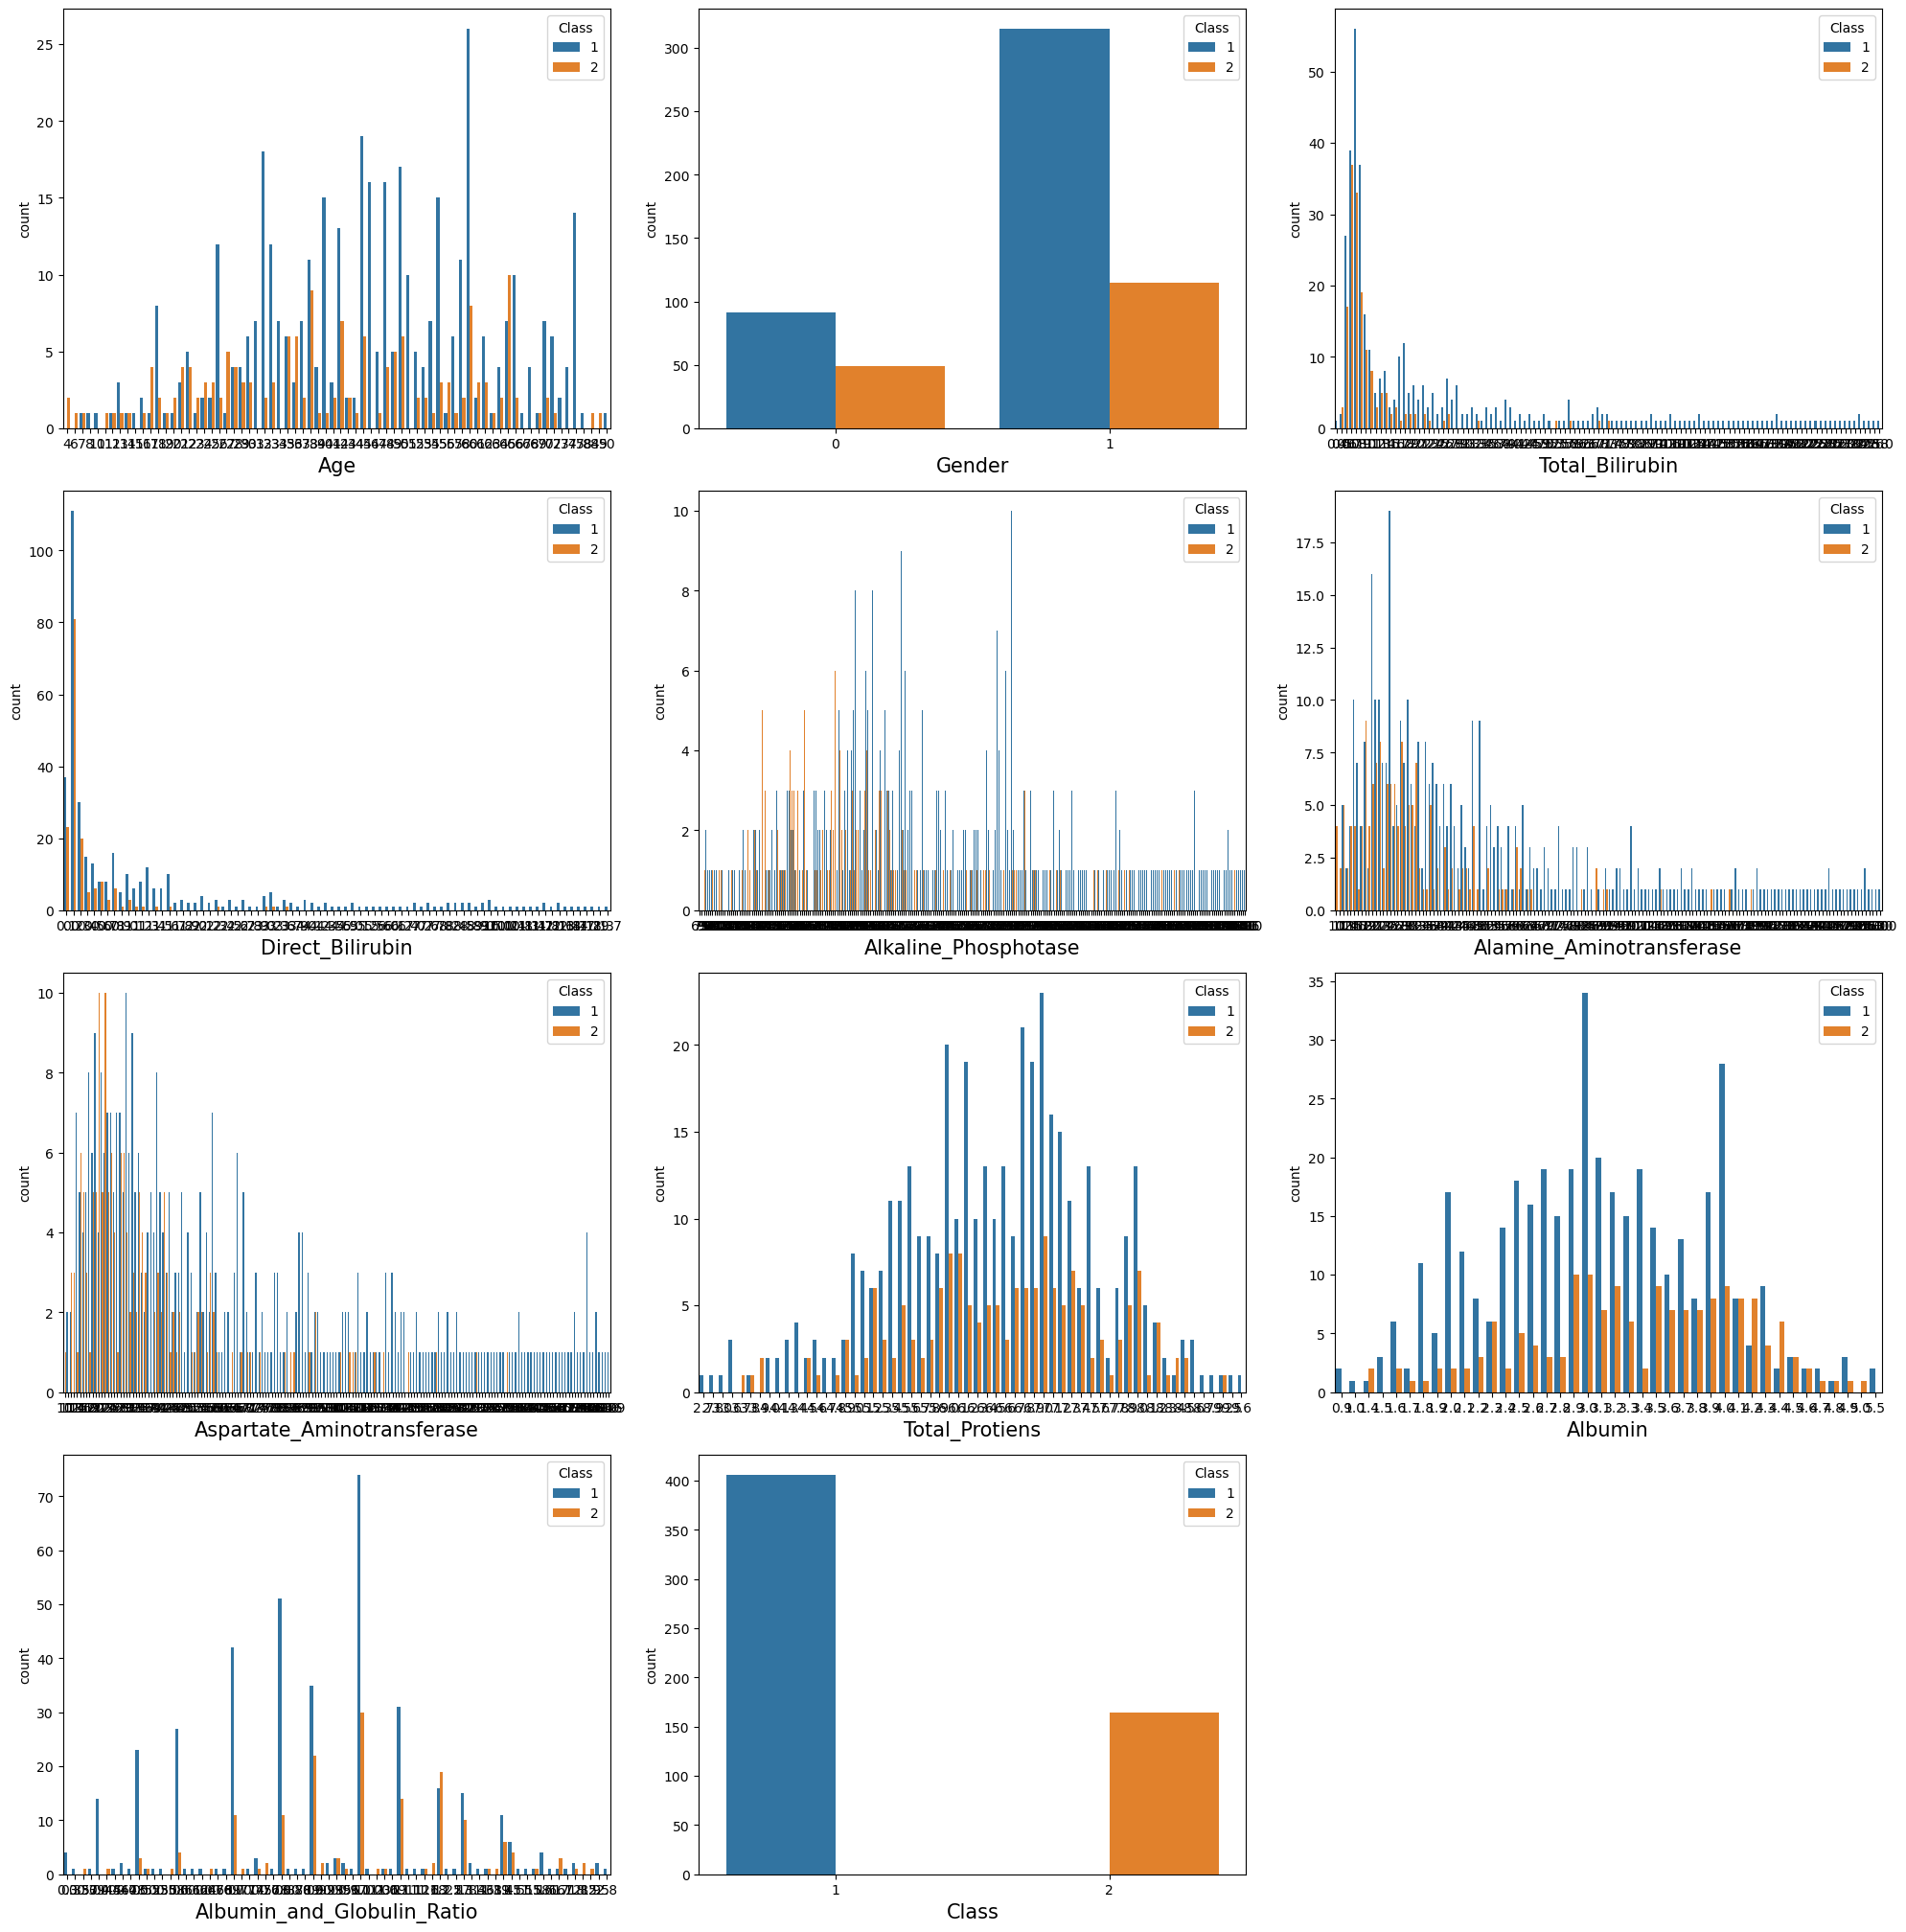

In [90]:
plt.figure(figsize=(20,60))
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(12,3,plotnumber)
        sns.countplot(x=data[column],hue='Class',data=data)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

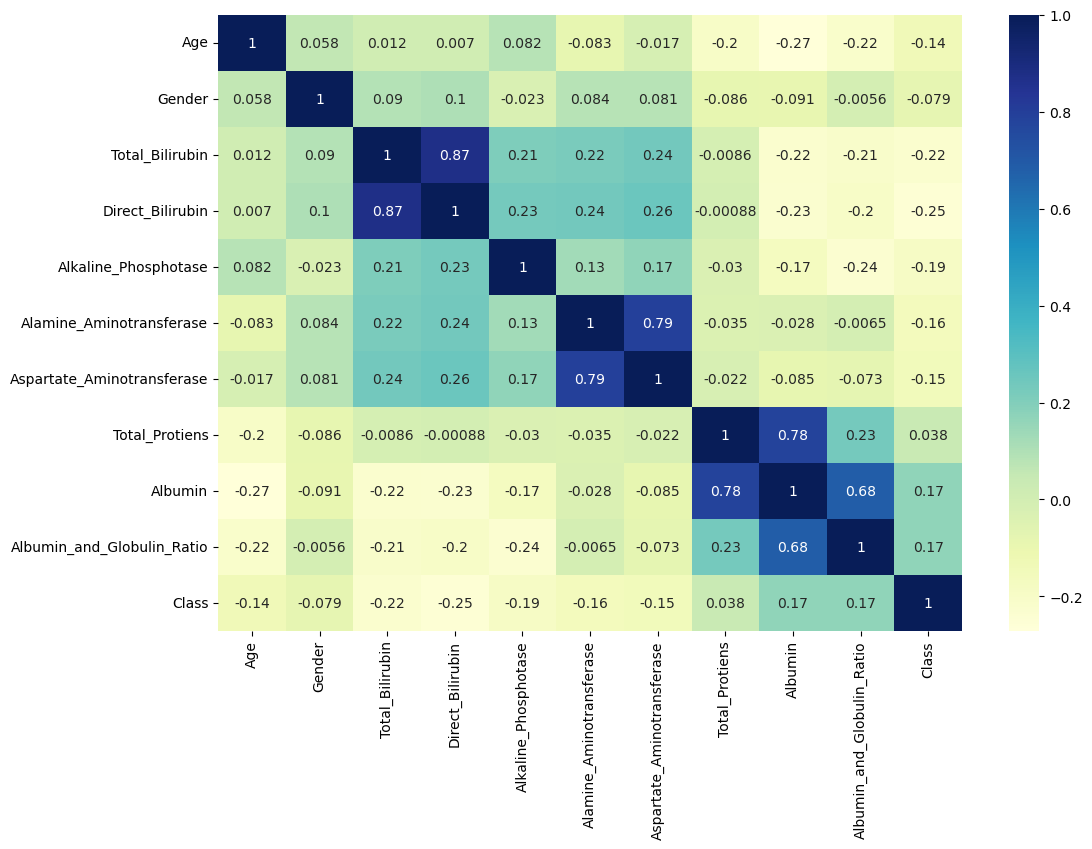

In [91]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

**Insights**
There are few predictors have high co-relation, however the percentage is not above 90% so we will not remove any features

# Outlier check

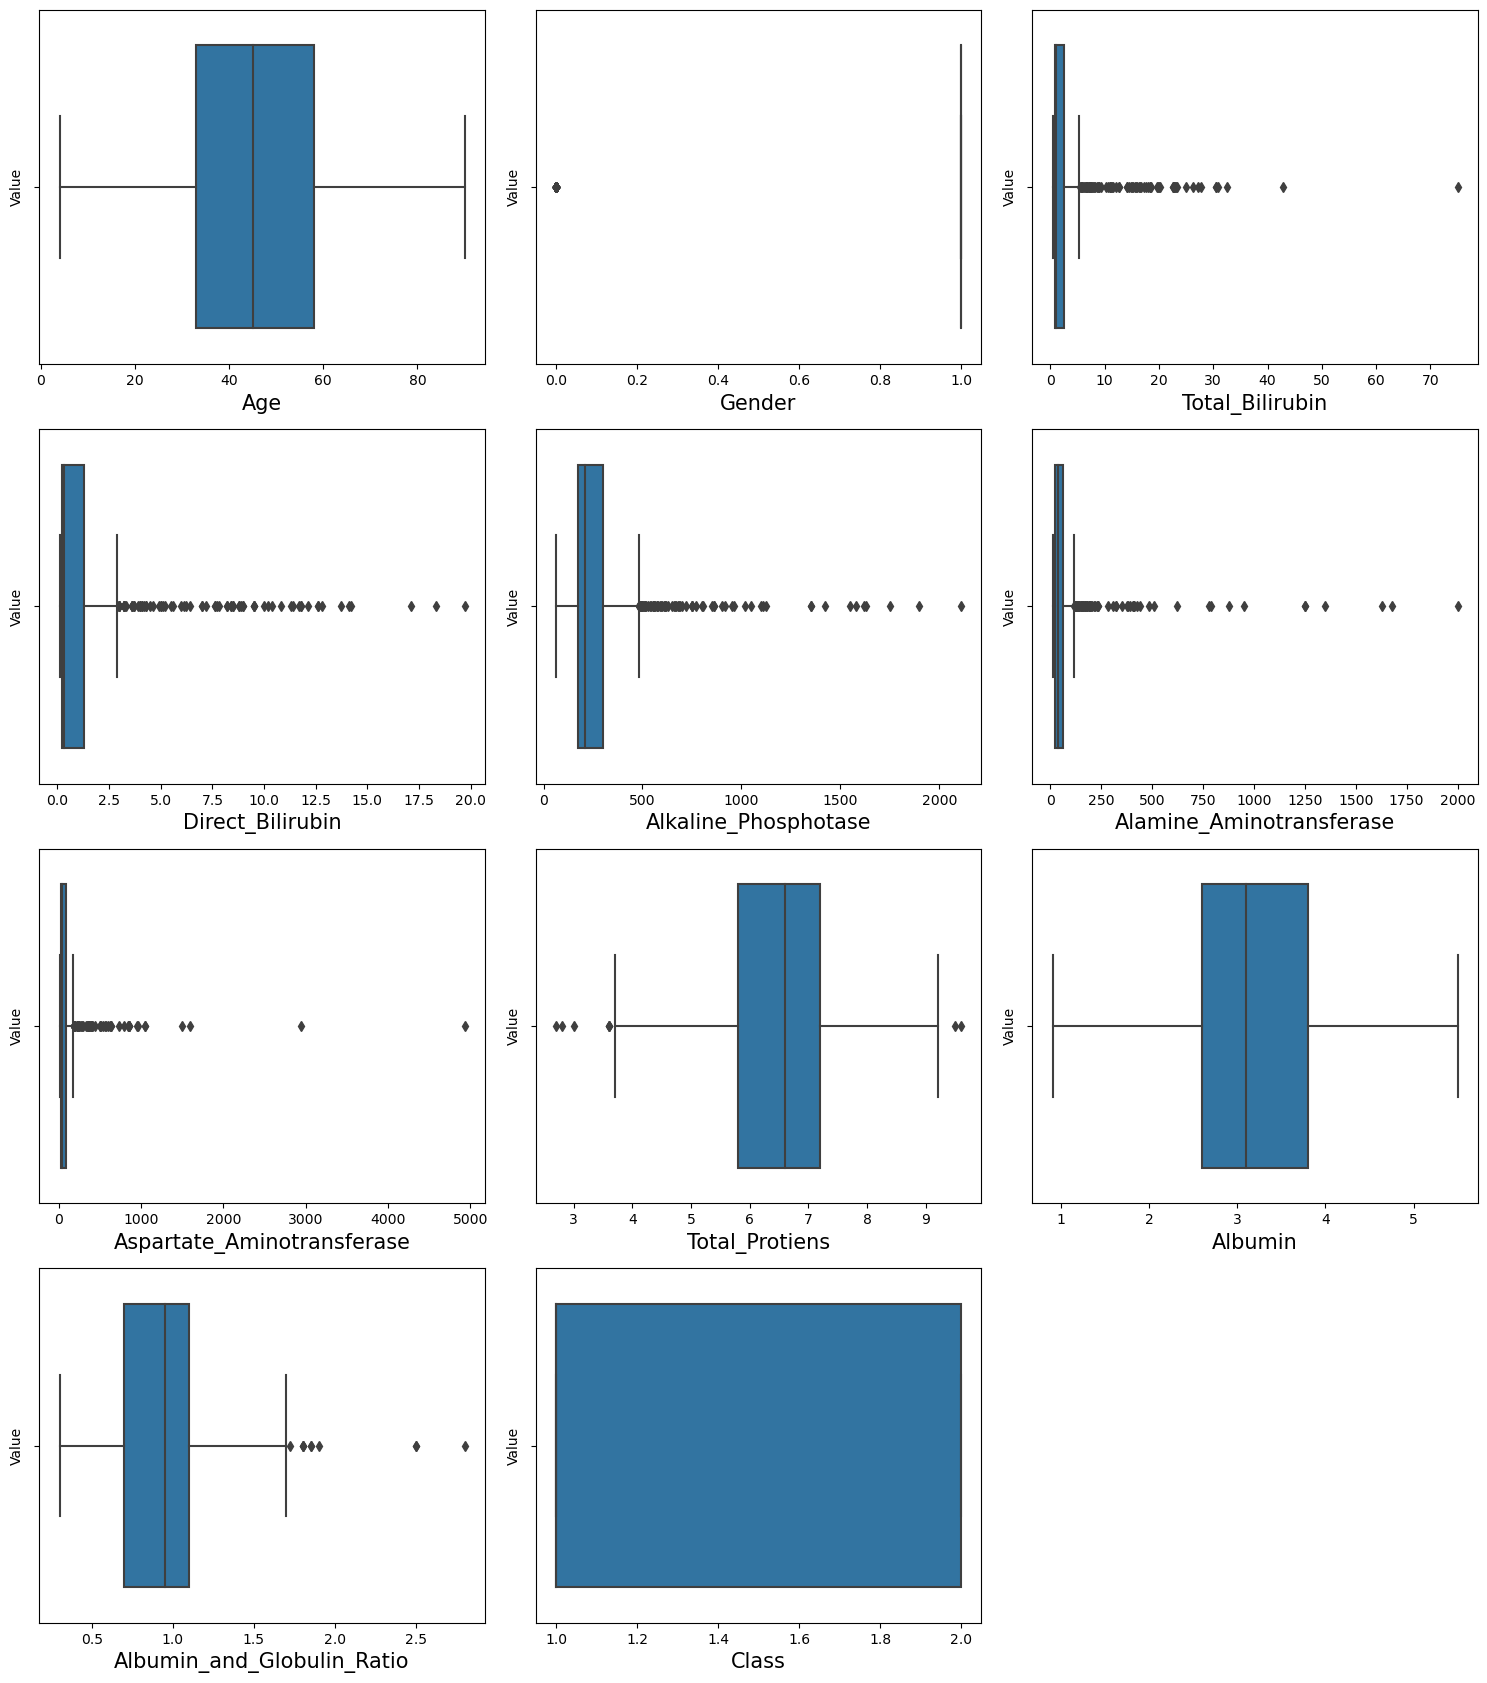

In [92]:
plt.figure(figsize=(15, 50))
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(12, 3, plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel("Value")
    plotnumber += 1

plt.tight_layout()
plt.show()

**Insights** - Extreme outliers found

# Handling outliers

In [93]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Class'],
      dtype='object')

# Sigmoid Method (IQR) to replace outliers

In [94]:
# Assuming 'data' is your DataFrame
columns_to_process = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                       'Total_Protiens', 'Albumin_and_Globulin_Ratio']

for column in columns_to_process:
    # Calculate Interquantile range
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)

    # Calculate lower and upper bridges
    lower_bridge = data[column].quantile(0.25) - (1.5 * IQR)
    upper_bridge = data[column].quantile(0.75) + (1.5 * IQR)

    # Replace values less than lower bridge with lower bridge value
    data.loc[data[column] <= lower_bridge, column] = lower_bridge
    
    # Replace values greater than upper bridge with upper bridge value
    data.loc[data[column] >= upper_bridge, column] = upper_bridge

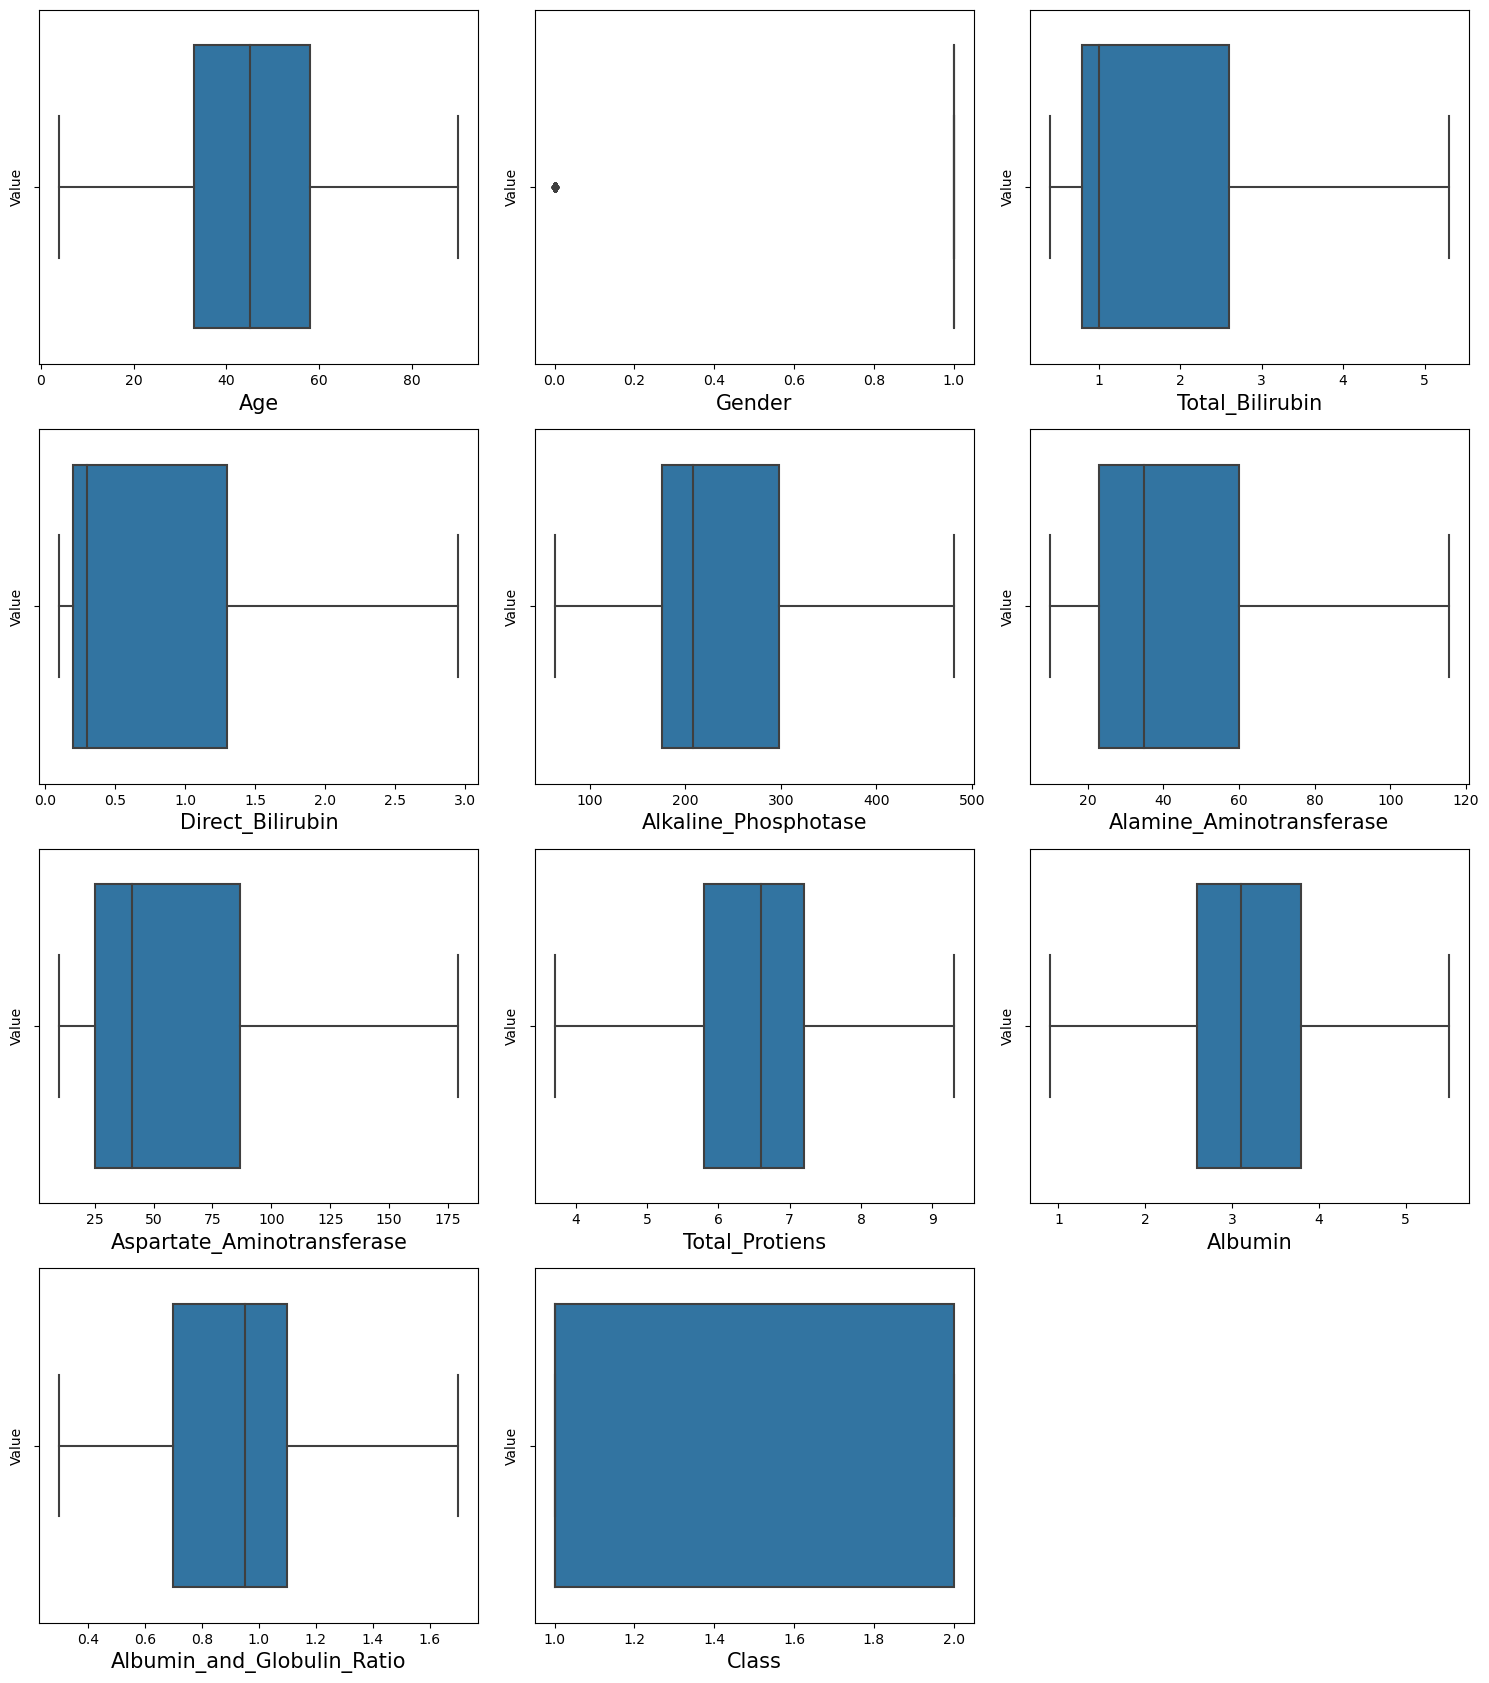

In [95]:
plt.figure(figsize=(15, 50))
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(12, 3, plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel("Value")
    plotnumber += 1

plt.tight_layout()
plt.show()

# Heatmap after updating outliers

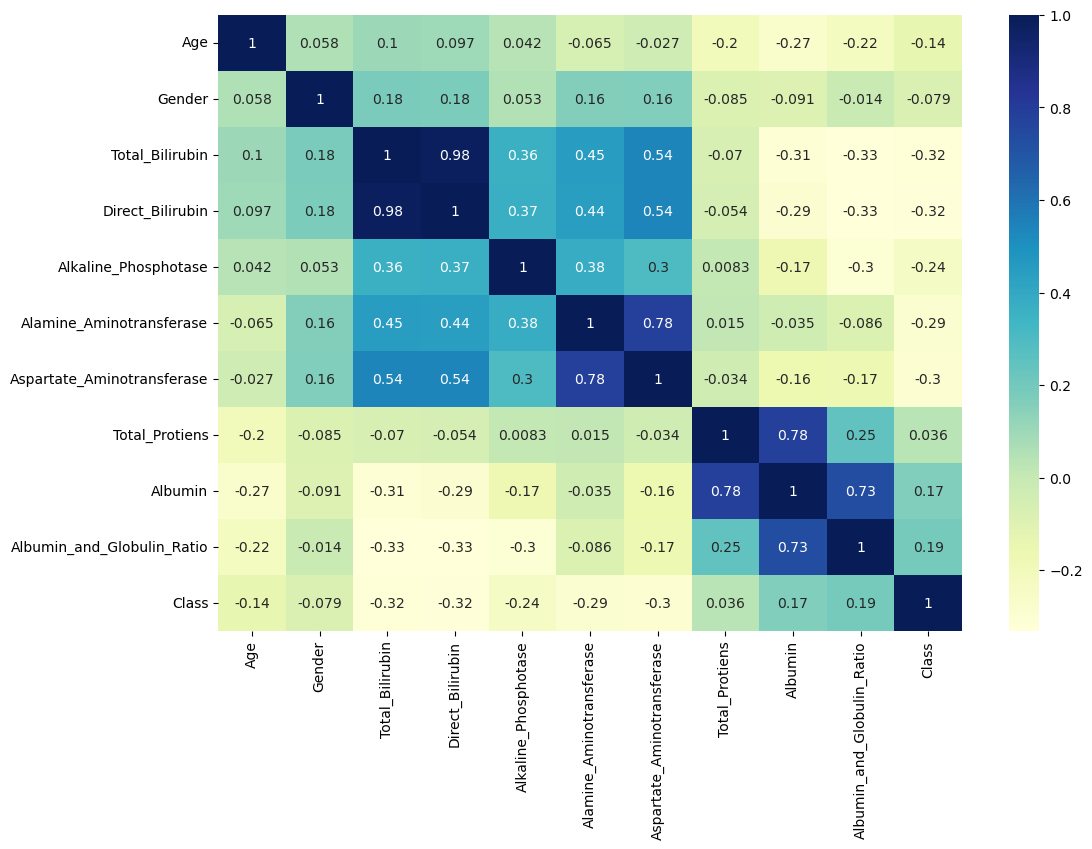

In [96]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

**Insights** After handling outliers we found that Total_Bilirubin and Direct_Bilirubin has high corelation.we will remove one column based on feature importance


# Feature importance

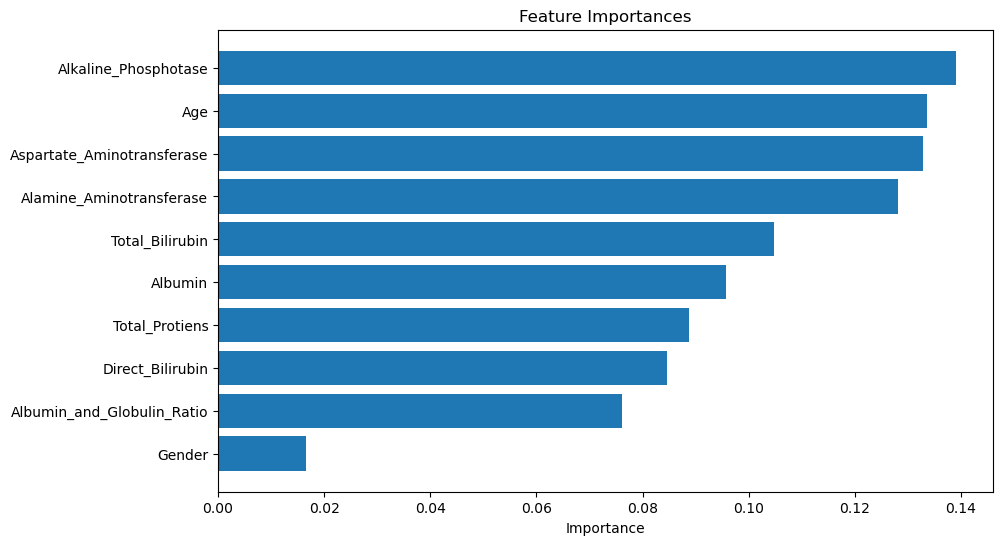

In [97]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Class' is your target variable
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Reverse the order of the DataFrame
feature_importance_df = feature_importance_df[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

**Insights** we decided to drop Direct_Bilirubin as per above feature importance chart

In [98]:
# Remove column Direct_Bilirubin
data.drop('Direct_Bilirubin', axis=1, inplace=True)

In [99]:
data.shape

(570, 10)

# Dataset Balance

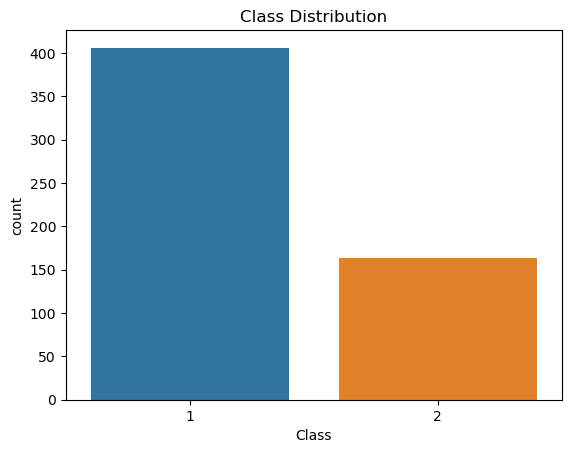

In [100]:
# Assuming 'data' is your DataFrame
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

**Insights** It is a imbalanced dataset, we will use SMOTE to balance it

# SMOTE

In [101]:
from imblearn.over_sampling import SMOTE
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [102]:
# Create a new DataFrame with the resampled features and target
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Check the resampled DataFrame
print(data_resampled)

     Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0     65       0         0.700000                   187   
1     62       1         5.300000                   481   
2     62       1         5.300000                   481   
3     58       1         1.000000                   182   
4     72       1         3.900000                   195   
..   ...     ...              ...                   ...   
807   35       0         0.773507                   202   
808   64       1         0.858956                   145   
809   30       1         1.805152                   307   
810   27       0         0.635488                   160   
811   19       0         0.674816                   202   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                   16.000000                   18.000000        6.800000   
1                   64.000000                  100.000000        7.500000   
2                   60.000000                   68.000000   

In [103]:
data = data_resampled

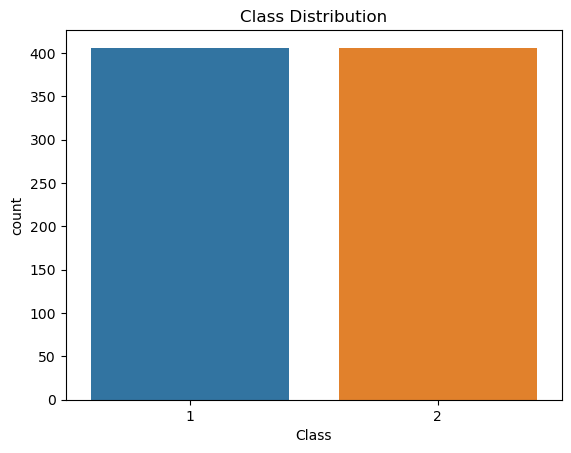

In [104]:
# Assuming 'data' is your DataFrame
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

**Insights**  Dataset is Balanced now

# Data Scaling

In [105]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'data' is your DataFrame
target_column = 'Class'

# Extract the target column
y = data[target_column]

# Exclude the target column from the features
X = data.drop(target_column, axis=1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale all numeric columns in X
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Concatenate the scaled features with the target column
data_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Check the updated DataFrame
print(data_scaled)

          Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0    0.709302     0.0         0.061224              0.296651   
1    0.674419     1.0         1.000000              1.000000   
2    0.674419     1.0         1.000000              1.000000   
3    0.627907     1.0         0.122449              0.284689   
4    0.790698     1.0         0.714286              0.315789   
..        ...     ...              ...                   ...   
807  0.360465     0.0         0.076226              0.332536   
808  0.697674     1.0         0.093664              0.196172   
809  0.302326     1.0         0.286766              0.583732   
810  0.267442     0.0         0.048059              0.232057   
811  0.174419     0.0         0.056085              0.332536   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                    0.056872                    0.047232        0.553571   
1                    0.511848                    0.531365        0.678571   


In [106]:
data_scaled.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,0.709302,0.0,0.061224,0.296651,0.056872,0.047232,0.553571,0.521739,0.428571,1
1,0.674419,1.0,1.000000,1.000000,0.511848,0.531365,0.678571,0.500000,0.314286,1
2,0.674419,1.0,1.000000,1.000000,0.473934,0.342435,0.589286,0.521739,0.421429,1
3,0.627907,1.0,0.122449,0.284689,0.037915,0.059041,0.553571,0.543478,0.500000,1
4,0.790698,1.0,0.714286,0.315789,0.161137,0.289299,0.642857,0.326087,0.071429,1


# Model 1 - Logistic Regression

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'data_scaled' is your DataFrame with scaled features and target column
X = data_scaled.drop('Class', axis=1)  # Features
y = data_scaled['Class']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the training set
logistic_train_predictions = logistic_model.predict(X_train)

# Evaluate the Logistic Regression model on training set
train_accuracy = accuracy_score(y_train, logistic_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
logistic_test_predictions = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model on test set
test_accuracy = accuracy_score(y_test, logistic_test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, logistic_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, logistic_test_predictions))



Training Accuracy: 0.73
Test Accuracy: 0.74

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.78      0.58      0.67        72
           2       0.72      0.87      0.79        91

    accuracy                           0.74       163
   macro avg       0.75      0.73      0.73       163
weighted avg       0.75      0.74      0.74       163


Confusion Matrix (Test Set):
[[42 30]
 [12 79]]


# Model 2 - Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the training set
random_forest_train_predictions = random_forest_model.predict(X_train)

# Evaluate the Random Forest model on training set
train_accuracy = accuracy_score(y_train, random_forest_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
random_forest_test_predictions = random_forest_model.predict(X_test)

# Evaluate the Random Forest model on test set
test_accuracy = accuracy_score(y_test, random_forest_test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, random_forest_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, random_forest_test_predictions))


Training Accuracy: 1.00
Test Accuracy: 0.81

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.80      0.76      0.78        72
           2       0.82      0.85      0.83        91

    accuracy                           0.81       163
   macro avg       0.81      0.81      0.81       163
weighted avg       0.81      0.81      0.81       163


Confusion Matrix (Test Set):
[[55 17]
 [14 77]]


# Model 3 - SVC

In [110]:
from sklearn.svm import SVC

In [111]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the training set
svm_train_predictions = svm_model.predict(X_train)

# Evaluate the SVM model on training set
train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
svm_test_predictions = svm_model.predict(X_test)

# Evaluate the SVM model on test set
test_accuracy = accuracy_score(y_test, svm_test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, svm_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, svm_test_predictions))

Training Accuracy: 0.72
Test Accuracy: 0.72

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.80      0.50      0.62        72
           2       0.69      0.90      0.78        91

    accuracy                           0.72       163
   macro avg       0.75      0.70      0.70       163
weighted avg       0.74      0.72      0.71       163


Confusion Matrix (Test Set):
[[36 36]
 [ 9 82]]


# Model 4-  Random Forest Hyper parameter tuned

In [112]:
from sklearn.model_selection import GridSearchCV

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are already defined

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model
best_random_forest_model = grid_search.best_estimator_

# Make predictions on the training set
random_forest_train_predictions = best_random_forest_model.predict(X_train)

# Evaluate the Random Forest model on training set
train_accuracy = accuracy_score(y_train, random_forest_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
random_forest_test_predictions = best_random_forest_model.predict(X_test)

# Evaluate the Random Forest model on test set
test_accuracy = accuracy_score(y_test, random_forest_test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Print other metrics such as classification report or confusion matrix for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, random_forest_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, random_forest_test_predictions))

Training Accuracy: 0.98
Test Accuracy: 0.82
Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.83      0.74      0.78        72
           2       0.81      0.88      0.84        91

    accuracy                           0.82       163
   macro avg       0.82      0.81      0.81       163
weighted avg       0.82      0.82      0.81       163


Confusion Matrix (Test Set):
[[53 19]
 [11 80]]


# Model 5 - GradientBoostingClassifier

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the model on the training set
gb_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_gb = gb_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_gb)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Evaluate the model on the test set
print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_gb))

Training Accuracy: 0.93
Test Accuracy: 0.78
Classification Report (Test Set):
               precision    recall  f1-score   support

           1       0.73      0.79      0.76        72
           2       0.82      0.77      0.80        91

    accuracy                           0.78       163
   macro avg       0.78      0.78      0.78       163
weighted avg       0.78      0.78      0.78       163



# Model 6 - SVM with Hyperparameter tuned

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# Define the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Make predictions on the training set
svm_train_predictions = best_svm_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
svm_test_predictions = best_svm_model.predict(X_test)

# Evaluate the SVM model on the test set
test_accuracy = accuracy_score(y_test, svm_test_predictions)

# Print the best parameters and performance metrics
print("Best Parameters:", best_params)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix
print("\nClassification Report (Test Set):")
print(classification_report(y_test, svm_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, svm_test_predictions))


Training Accuracy: 0.72
Best Parameters: {'C': 1, 'gamma': 'scale'}
Test Accuracy: 0.72

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.80      0.50      0.62        72
           2       0.69      0.90      0.78        91

    accuracy                           0.72       163
   macro avg       0.75      0.70      0.70       163
weighted avg       0.74      0.72      0.71       163


Confusion Matrix (Test Set):
[[36 36]
 [ 9 82]]


# Model 7 - XGBClassifer Hyperparameter tuned

In [117]:
from xgboost import XGBClassifier

# Assuming X and y are your feature matrix and target variable
# Make sure to adjust y so that class labels start from 0
y = y - 1  # Assuming original labels are 1 and 2, convert them to 0 and 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Make predictions on the training set
xgb_train_predictions = best_xgb_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, xgb_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
xgb_test_predictions = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model on the test set
test_accuracy = accuracy_score(y_test, xgb_test_predictions)

# Print the best parameters and performance metrics
print("Best Parameters:", best_params)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix
print("\nClassification Report (Test Set):")
print(classification_report(y_test, xgb_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, xgb_test_predictions))

Training Accuracy: 1.00
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Test Accuracy: 0.85

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        72
           1       0.87      0.86      0.86        91

    accuracy                           0.85       163
   macro avg       0.84      0.85      0.84       163
weighted avg       0.85      0.85      0.85       163


Confusion Matrix (Test Set):
[[60 12]
 [13 78]]


# Model Comparsion report

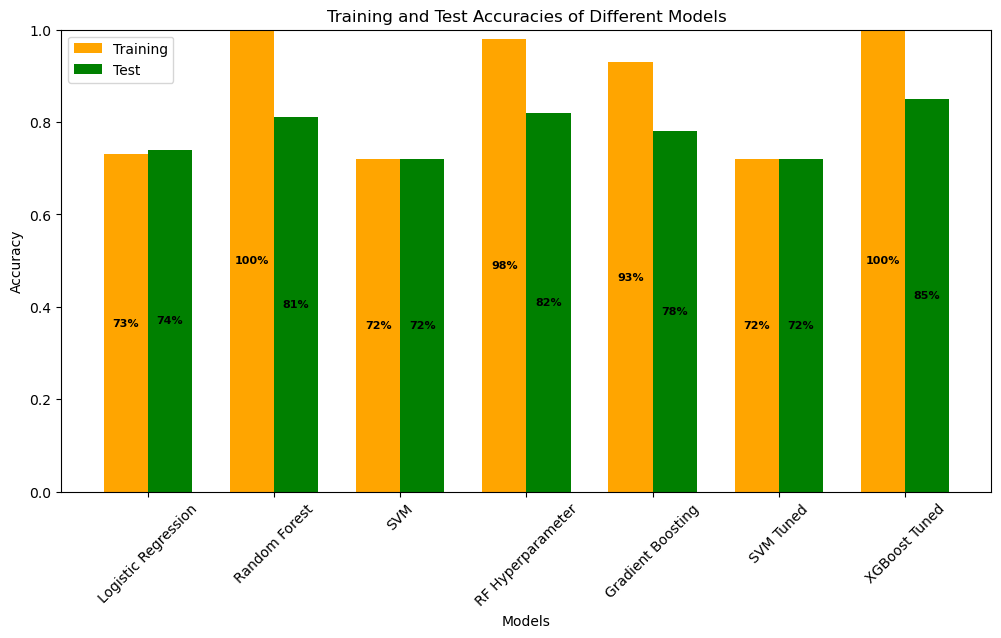

In [118]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'RF Hyperparameter', 'Gradient Boosting', 'SVM Tuned', 'XGBoost Tuned']
training_accuracies = [0.73, 1.00, 0.72, 0.98, 0.93, 0.72, 1.00]
test_accuracies = [0.74, 0.81, 0.72, 0.82, 0.78, 0.72, 0.85]

bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(index - bar_width/2, training_accuracies, bar_width, label='Training', color='orange')
bar2 = ax.bar(index + bar_width/2, test_accuracies, bar_width, label='Test', color='green')

ax.set_title('Training and Test Accuracies of Different Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)  # Set the y-axis limit to the range of accuracy (0 to 1)
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Add percentage values inside the bars
for bar, train_acc, test_acc in zip(bar1, training_accuracies, test_accuracies):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{train_acc*100:.0f}%', color='black',
            ha='center', va='center', fontsize=8, fontweight='bold')
    
for bar, test_acc in zip(bar2, test_accuracies):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{test_acc*100:.0f}%', color='black',
            ha='center', va='center', fontsize=8, fontweight='bold')

plt.show()


# Model comparsion summary

**The XGBoost model** after hyperparameter tuning, emerges as the top-performing choice among the evaluated models, displaying a robust balance with a **100%** training accuracy and an impressive **85%** test accuracy.

This model outshines others in generalization. Random Forest and Gradient Boosting models exhibit competitive performance, but their susceptibility to overfitting warrants caution. Logistic Regression delivers a modest yet interpretable performance. SVM, both tuned and untuned, demonstrates moderate accuracy. Considering interpretability, generalization, and overall performance, the recommended choice is the XGBoost model for its remarkable accuracy on both training and test sets, demonstrating resilience to overfitting.

# Conclusion

Our final recommendation is the **XGBoost classifier, fine-tuned** through meticulous hyperparameter adjustments. Boasting a noteworthy **100%** training accuracy and an impressive **85%** accuracy on the test set, the model excels in demonstrating robust generalization capabilities. Its superior performance, harmonized with interpretability, solidifies its position as the preferred choice. Nonetheless, to ensure the model's reliability across diverse scenarios, practical validation using real-world data is strongly advised